In [2]:
import pandas as pd 
import matplotlib.pyplot as plt


# Import CSVs

In [3]:

mario_a3c_test_file='csv/mario/mario_a3c_test20210331-134313.csv'
mario_a3c_train_file='csv/mario/mario_a3c_train20210331-134313.csv'

mario_a3c_test = pd.read_csv(mario_a3c_test_file)
mario_a3c_train = pd.read_csv(mario_a3c_train_file)

#
#mario_a3c_test=mario_a3c_test.iloc[::10]
mario_a3c_train['AverageReward'] = mario_a3c_train.groupby('Steps')['Reward'].transform('mean')
mario_a3c_train['AverageTotalReward'] = mario_a3c_train.groupby('Steps')['TotalReward'].transform('mean')
mario_a3c_train['AverageScore'] = mario_a3c_train.groupby('Steps')['Score'].transform('mean')


mario_a3c_train=mario_a3c_train.sort_values(by=['Steps'])

mario_ppo_test_file='csv/mario/mario_PPO_test20210401-130840.csv'
mario_ppo_train_file='csv/mario/mario_PPO_train20210401-130840.csv'

mario_ppo_test= pd.read_csv(mario_ppo_test_file)
mario_ppo_train=pd.read_csv(mario_ppo_train_file)

#mario_ppo_test.plot.scatter(x='Steps',y='TotalReward',title="Mario - PPO Test - Reward By Steps")
mario_ppo_train.plot.scatter(x='Steps',y='MeanScores',title="Mario - PPO Train - Reward By Steps")

#mario_a3c_test_graph =mario_a3c_test.plot(x='Steps',y='Score',title="Mario - A3C Test - Reward By Steps")
#mario_a3c_test_graph.set_xlabel("Timesteps")

mario_a3c_train_graph = mario_a3c_train.plot.scatter(x='Steps',y='AverageScore',title="Mario - A3C Train - Reward By Steps")
mario_a3c_train_graph.set_xlabel("Timesteps")



In [4]:
gradius_a3c_test_file='csv/gradius/gradius_a3c_test20210325-150219.csv'
gradius_a3c_train_file='csv/gradius/gradius_a3c_train20210325-150219.csv'

gradius_a3c_test = pd.read_csv(gradius_a3c_test_file)
gradius_a3c_train = pd.read_csv(gradius_a3c_train_file)


gradius_a3c_test=gradius_a3c_test.iloc[::4]
gradius_a3c_train['AverageReward'] = gradius_a3c_train.groupby('Steps')['TotalReward'].transform('mean')
gradius_a3c_train=gradius_a3c_train.sort_values(by=['Steps'])

Text(0.5, 0, 'Timesteps')

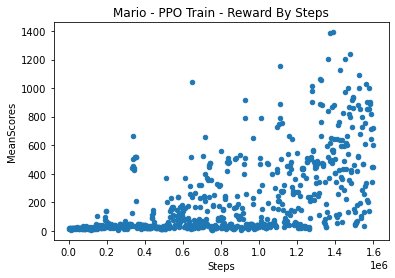

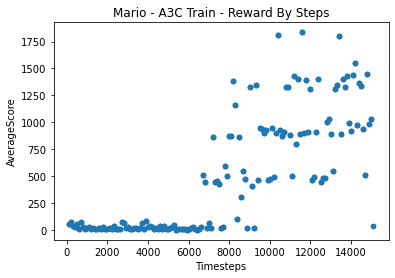

In [29]:

mario_a3c_test_file='csv/mario/mario_a3c_test20210331-134313.csv'
mario_a3c_train_file='csv/mario/mario_a3c_train20210331-134313.csv'

mario_a3c_test = pd.read_csv(mario_a3c_test_file)
mario_a3c_train = pd.read_csv(mario_a3c_train_file)

#
#mario_a3c_test=mario_a3c_test.iloc[::10]
mario_a3c_train['AverageReward'] = mario_a3c_train.groupby('Steps')['Reward'].transform('mean')
mario_a3c_train['AverageTotalReward'] = mario_a3c_train.groupby('Steps')['TotalReward'].transform('mean')
mario_a3c_train['AverageScore'] = mario_a3c_train.groupby('Steps')['Score'].transform('mean')


mario_a3c_train=mario_a3c_train.sort_values(by=['Steps'])

mario_ppo_test_file='csv/mario/mario_PPO_test20210401-130840.csv'
mario_ppo_train_file='csv/mario/mario_PPO_train20210401-130840.csv'

mario_ppo_test= pd.read_csv(mario_ppo_test_file)
mario_ppo_train=pd.read_csv(mario_ppo_train_file)

#mario_ppo_test.plot.scatter(x='Steps',y='TotalReward',title="Mario - PPO Test - Reward By Steps")
mario_ppo_train.plot.scatter(x='Steps',y='MeanScores',title="Mario - PPO Train - Reward By Steps")

#mario_a3c_test_graph =mario_a3c_test.plot(x='Steps',y='Score',title="Mario - A3C Test - Reward By Steps")
#mario_a3c_test_graph.set_xlabel("Timesteps")

mario_a3c_train_graph = mario_a3c_train.plot.scatter(x='Steps',y='AverageScore',title="Mario - A3C Train - Reward By Steps")
mario_a3c_train_graph.set_xlabel("Timesteps")



In [6]:

spaceinvaders_a3c_test_file='csv/spaceinvaders/spaceinvaders_a3c_test20210325-143439.csv'
spaceinvaders_a3c_train_file='csv/spaceinvaders/spaceinvaders_a3c_train20210325-143439.csv'

spaceinvaders_a3c_test = pd.read_csv(spaceinvaders_a3c_test_file)
spaceinvaders_a3c_train = pd.read_csv(spaceinvaders_a3c_train_file)

spaceinvaders_a3c_test=spaceinvaders_a3c_test.iloc[::4]

spaceinvaders_a3c_train['AverageReward'] = spaceinvaders_a3c_train.groupby('Steps')['TotalReward'].transform('mean')

spaceinvaders_a3c_train=spaceinvaders_a3c_train.sort_values(by=['Steps'])


In [7]:

pacman_a3c_test_file='csv/pacman/pacman_a3c_test20210326-120811.csv'
pacman_a3c_train_file='csv/pacman/pacman_a3c_train20210326-120811.csv'

pacman_a3c_test = pd.read_csv(pacman_a3c_test_file)
pacman_a3c_train = pd.read_csv(pacman_a3c_train_file)

pacman_a3c_test=pacman_a3c_test.iloc[::4]

pacman_a3c_train['AverageReward'] = pacman_a3c_train.groupby('Steps')['TotalReward'].transform('mean')
pacman_a3c_train=pacman_a3c_train.sort_values(by=['Steps'])


# Graphs

In [8]:
'''
mario_a3c_train.plot(x='Steps',y='AverageReward',title="Mario - A3C Test - Reward By Steps")
gradius_a3c_train.plot(x='Steps',y='AverageReward',title="Gradius - A3C Test - Reward By Steps")
spaceinvaders_a3c_train.plot(x='Steps',y='AverageReward',title="Space Invaders - A3C Test - Reward By Steps")
pacman_a3c_train.plot(x='Steps',y='AverageReward',title="Pac-Man - A3C Test - Reward By Steps")
donkeykong_a3c_train.plot(x='Steps',y='AverageReward',title="Donkey Kong - A3C Test - Reward By Steps")
'''

'\nmario_a3c_train.plot(x=\'Steps\',y=\'AverageReward\',title="Mario - A3C Test - Reward By Steps")\ngradius_a3c_train.plot(x=\'Steps\',y=\'AverageReward\',title="Gradius - A3C Test - Reward By Steps")\nspaceinvaders_a3c_train.plot(x=\'Steps\',y=\'AverageReward\',title="Space Invaders - A3C Test - Reward By Steps")\npacman_a3c_train.plot(x=\'Steps\',y=\'AverageReward\',title="Pac-Man - A3C Test - Reward By Steps")\ndonkeykong_a3c_train.plot(x=\'Steps\',y=\'AverageReward\',title="Donkey Kong - A3C Test - Reward By Steps")\n'

In [9]:

#gradius_a3c_test.plot(x='Steps',y='TotalReward',title="Gradius - A3C Test - Reward By Steps")
#spaceinvaders_a3c_test.plot(x='Steps',y='TotalReward',title="Space Invaders - A3C Test - Reward By Steps")
#pacman_a3c_test.plot(x='Steps',y='TotalReward',title="Pac-Man - A3C Test - Reward By Steps")
#arkanoid_a3c_test.plot(x='Steps',y='TotalReward',title="Arkanoid - A3C Test - Reward By Steps")

In [ ]:
ppo_train_graph = ppo_train.plot(x='Steps',y='MeanReward',title="PPO Train - Reward By Steps",color='#b161c9')
ppo_train_graph.set_ylabel("Reward")

In [ ]:
ppo_test.plot(x='Steps',y='TotalReward',title="PPO Test - Reward By Steps")

# Save

In [ ]:
mario_ppo_test.plot()